In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex

In [3]:
def print_latex(f):
    display(Math(sp.latex(f)))

In [4]:
def calculate_func(formula, x_data):
    y_data = []
    x = sp.symbols('x')
    for i in x_data:
        y_data.append(formula.subs(x, i))
    return np.array([x_data, y_data])

In [5]:
def drawPoints_and_poly(points_data, poly_formula):
    mn = min(points_data[0])
    mx = max(points_data[0])
    e = (mx - mn) / 10
    t = np.arange(mn - e, mx + e , 0.02)
    plt.plot(points_data[0], points_data[1], 'o', t, calculate_func(poly_formula, t)[1], 'k')
    plt.show()

In [6]:
def lagrange_polynomial(data):
    xs, ys = data[0], data[1]
    x = sp.symbols('x')
    formula = '0'
    n = xs.shape[0]
    f = lambda a, b : ' * (' + str(a) + ' - ' + str(b) +')'
    for i in range(0, n):
        numerator, denominator = '1', '1'
        for k in range(0, i, 1):
            numerator += f('x', xs[k])
            denominator += f(xs[i], xs[k]) 
        for l in range(i + 1, n):
            numerator += f('x', xs[l])
            denominator += f(xs[i], xs[l])
        formula += '+' + str(ys[i]) + '*' +  numerator + '/(' + denominator + ')'
    return sp.sympify(formula)
        

In [7]:
def calculate_polyError(data, func_formula):
    xs, ys = data[0], data[1]
    size = xs.shape[0]
    fact = np.math.factorial(size)
    coeff = 1.0 / fact
    pn_1 = '1'
    f = lambda a, b : ' * (' + str(a) + ' - ' + str(b) +')'
    for i in range(0, size):
        pn_1 += f('x', xs[i])
    x = sp.symbols('x')
    dif_func = sp.diff(func_formula, x, size)
    formula = sp.sympify(pn_1)
    formula = formula * dif_func
    formula *= coeff #sp.sympify(coeff)
    return formula
    

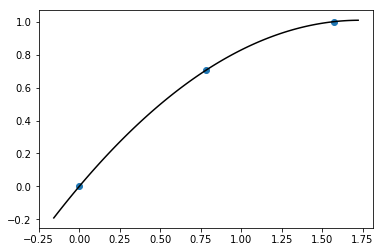

<IPython.core.display.Math object>

-0.0207193080877601

In [138]:
data = np.array([[0, np.pi/4, np.pi /2],
                 [0, np.sqrt(2)/2, 1]])
poly = lagrange_polynomial(data)
sp.expand(poly)
drawPoints_and_poly(data, poly)

x = sp.symbols('x')
func = sp.sin(x)
a = calculate_polyError(data, func)
print_latex(sp.expand(a))
err = a.subs(x, np.pi/6)
err

<IPython.core.display.Math object>

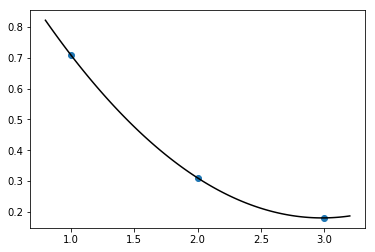

In [104]:
data = np.array([[1   , 2   , 3],
                  [0.71, 0.31, 0.18]])
f = lagrange_polynomial(data)
display(Math(sp.latex(sp.expand(f))))
drawPoints_and_poly(data, f)

1.06408000000000


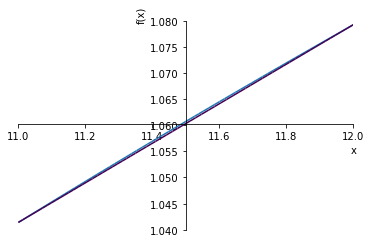

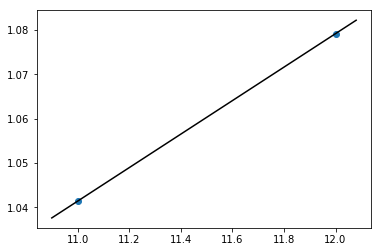

0.2*(x - 15.0)*(x - 14.0)*(x - 13.0)*(x - 12.0)*(x - 11.0)/(x**5*log(10))

In [114]:
data = np.array([[11    , 12    , 13    , 14    , 15    ],
                  [1.0414, 1.0792, 1.1139, 1.1461, 1.1761]])
x = sp.symbols('x')
func = sp.ln(x)/sp.ln(10)
d = data[:,0:2]
f = lagrange_polynomial(d)
print(f.subs(x, 11.6))
func.subs(x, 11)

p = sp.plot(func, f, (x, 11, 12), show = False)
p[1].line_color = 0.1
p.show()

drawPoints_and_poly(d, f)

a = calculate_polyError(data, func)
a

<IPython.core.display.Math object>

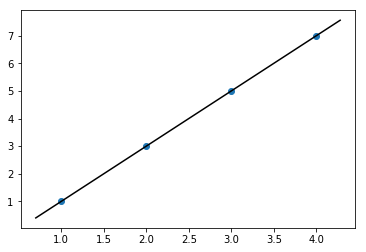

In [8]:
#memes
data = np.array([[1, 2, 3, 4],
                 [1, 3, 5, 7]])
f = lagrange_polynomial(data)
display(Math(sp.latex(sp.expand(f))))
drawPoints_and_poly(data, f)